In [1]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np

In [2]:
# Step 2: Load Dataset
# Make sure Data.csv is in the same folder as this notebook
data = pd.read_csv("Data.csv")

In [3]:
# Preview first 5 rows
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,ID,Title,Description,Category_title,Geometry_Coordinates_1,Geometry_Coordinates_2,Geometry_Coordinates_3,Geometry_Coordinates_4,Date,Time
0,EONET_14198,HOPE Wildfire Stevens Washington,15 Miles N from KETTLE FALLS WA,Wildfires,-117.982361 48.821248,NaN,NaN,NaN,2025-07-08,16:38:00
1,EONET_14200,Hot Canyon Wildfire Elko Nevada,10 Miles NW from Montello NV,Wildfires,-114.336333 41.368,NaN,NaN,NaN,2025-07-08,16:18:00
2,EONET_14215,13 MILE FIRE Wildfire Palm Beach Florida,21 Miles S from BELLE GLADE FL,Wildfires,-80.79 26.3833333,NaN,NaN,NaN,2025-07-08,15:34:00
3,EONET_14209,UDC Fire Wildfire Jefferson Oregon,1 Miles SW from warm springs OR,Wildfires,-121.288889 44.803444,NaN,NaN,NaN,2025-07-07,22:59:00
4,EONET_14199,0482 SUNRISE Wildfire Crook Oregon,8 Miles S from Paulina OR,Wildfires,-120.038167 44.019167,NaN,NaN,NaN,2025-07-07,14:45:00


In [4]:
# Step 3a: Dataset Info
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5393 entries, 0 to 5392
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      5393 non-null   object
 1   Title                   5393 non-null   object
 2   Description             634 non-null    object
 3   Category_title          5393 non-null   object
 4   Geometry_Coordinates_1  5393 non-null   object
 5   Geometry_Coordinates_2  31 non-null     object
 6   Geometry_Coordinates_3  30 non-null     object
 7   Geometry_Coordinates_4  28 non-null     object
 8   Date                    5393 non-null   object
 9   Time                    5393 non-null   object
dtypes: object(10)
memory usage: 421.5+ KB


In [5]:
# Step 3b: Descriptive Statistics
print("\nSummary Statistics:")
display(data.describe())


Summary Statistics:


,ID,Title,Description,Category_title,Geometry_Coordinates_1,Geometry_Coordinates_2,Geometry_Coordinates_3,Geometry_Coordinates_4,Date,Time
count,5393,5393,634,5393,5393,31,30,28,5393,5393
unique,5393,5379,627,4,5359,31,30,28,475,807
top,EONET_980,pouch point Wildfire Mountrail North Dakota,null Miles null from null,Wildfires,-81.085317 25.94815,-78.7 31.9,-78.8 32.7,-79.1 33.6,2024-08-09,19:00:00
freq,1,3,5,5318,3,1,1,1,68,3856


In [6]:
# Step 3c: Missing Values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
ID                           0
Title                        0
Description               4759
Category_title               0
Geometry_Coordinates_1       0
Geometry_Coordinates_2    5362
Geometry_Coordinates_3    5363
Geometry_Coordinates_4    5365
Date                         0
Time                         0
dtype: int64


In [7]:
# Step 4: Explore Categories
print("\nUnique Disaster Categories:")
print(data['Category_title'].unique())


Unique Disaster Categories:
['Wildfires' 'Severe Storms' 'Volcanoes' 'Sea and Lake Ice']


In [8]:
print("\nNumber of Events per Disaster Category:")
print(data['Category_title'].value_counts())


Number of Events per Disaster Category:
Category_title
Wildfires           5318
Sea and Lake Ice      40
Volcanoes             32
Severe Storms          3
Name: count, dtype: int64


WEEK 2 PROJECT: EDA, Data Transformation, and Feature Selection

In [2]:
# Step 1: Import additional libraries for visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset (assuming Data.csv is in the same directory)
data = pd.read_csv("Data.csv")

# --- Exploratory Data Analysis (EDA) ---
print("--- Starting Exploratory Data Analysis (EDA) ---")

--- Starting Exploratory Data Analysis (EDA) ---


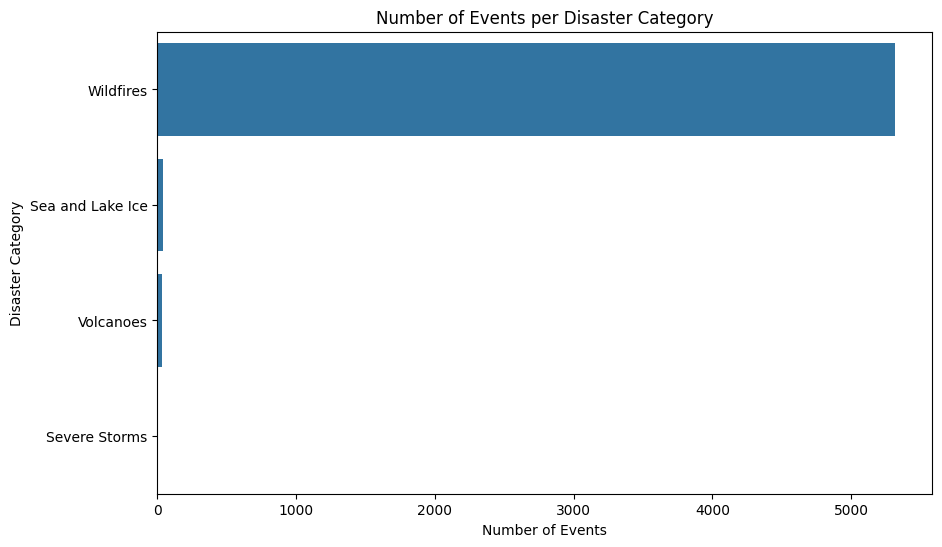

In [3]:
# Visualize the distribution of disaster categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category_title', data=data, order=data['Category_title'].value_counts().index)
plt.title('Number of Events per Disaster Category')
plt.xlabel('Number of Events')
plt.ylabel('Disaster Category')
plt.show()

C:\Users\sarve\AppData\Local\Temp\ipykernel_23392\1345163807.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.resample('M')['ID'].count().plot()


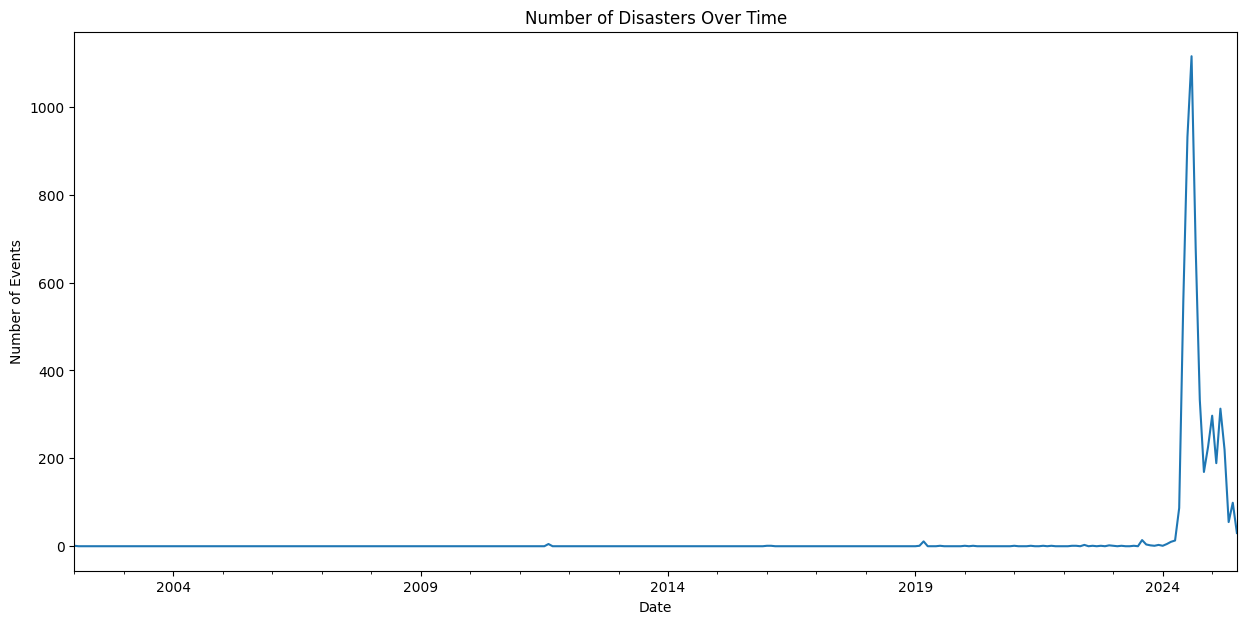

In [4]:
# Combine 'Date' and 'Time' columns into a single datetime object
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.set_index('Datetime', inplace=True)

# Plot event frequency over time
plt.figure(figsize=(15, 7))
data.resample('M')['ID'].count().plot()
plt.title('Number of Disasters Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

Data Transformation
Now, we'll transform our raw data into a clean and structured format. We'll handle missing values and convert our coordinates into a more usable format.

In [8]:
# 1. Handle missing values in 'Description' by filling them with a placeholder
data['Description'] = data['Description'].fillna('No description provided')
print("\n--- Starting Data Transformation ---")
print("Number of missing values in 'Description' after filling:")
print(data['Description'].isnull().sum())

# 2. Split the 'Geometry_Coordinates_1' column into 'Longitude' and 'Latitude'
# Use regex '\s+' to handle any type of whitespace (normal space, multiple spaces, non-breaking space)
coordinates = data['Geometry_Coordinates_1'].str.split(r'\s+', expand=True)

# Convert the split values to numeric safely
data['Longitude'] = pd.to_numeric(coordinates[0], errors='coerce')
data['Latitude'] = pd.to_numeric(coordinates[1], errors='coerce')

print("\nSample of split coordinates:")
print(data[['Geometry_Coordinates_1', 'Longitude', 'Latitude']].head())

# 3. Create new features from the 'Datetime' index
data['Month'] = data.index.month
data['DayOfWeek'] = data.index.dayofweek

# 4. Drop rows with missing multi-point coordinates (2, 3, 4)
# These correspond to complex storms and are a small portion of the data
data.dropna(subset=['Geometry_Coordinates_2', 
                    'Geometry_Coordinates_3', 
                    'Geometry_Coordinates_4'], inplace=True)

print("\n--- Data Transformation Completed ---")
print(data.head())


--- Starting Data Transformation ---
Number of missing values in 'Description' after filling:
0

Sample of split coordinates:
                     Geometry_Coordinates_1   Longitude   Latitude
Datetime                                                          
2025-07-08 16:38:00  -117.982361  48.821248 -117.982361  48.821248
2025-07-08 16:18:00     -114.336333  41.368 -114.336333  41.368000
2025-07-08 15:34:00      -80.79  26.3833333  -80.790000  26.383333
2025-07-07 22:59:00  -121.288889  44.803444 -121.288889  44.803444
2025-07-07 14:45:00  -120.038167  44.019167 -120.038167  44.019167

--- Data Transformation Completed ---
                              ID                   Title  \
Datetime                                                   
2025-07-05 15:00:00  EONET_14180  Tropical Storm Chantal   
2025-07-04 12:00:00  EONET_14174           Typhoon Danas   
2025-07-02 06:00:00  EONET_14153      Tropical Storm Mun   
2025-04-24 00:00:00  EONET_13367            Iceberg A23C   
2025-

Feature Selection
Finally, we'll select the most important features and drop the original columns that are now redundant. The resulting DataFrame will be ready for further analysis in Week 3.

In [6]:
# Drop unnecessary columns that are not useful for modeling
features_to_drop = [
    'ID', 'Title', 'Description', 'Date', 'Time', 
    'Geometry_Coordinates_1', 'Geometry_Coordinates_2', 
    'Geometry_Coordinates_3', 'Geometry_Coordinates_4'
]
data_processed = data.drop(columns=features_to_drop)

# Display the final processed DataFrame and its columns
print("\n--- Starting Feature Selection ---")
print("Processed data with selected features:")
print(data_processed.head())
print("\nFinal list of columns for Week 3:")
print(data_processed.columns)

# Save the processed data for use in the next phase
data_processed.to_csv("processed_data.csv")
print("\nProcessed data saved to 'processed_data.csv'")


--- Starting Feature Selection ---
Processed data with selected features:
                    Category_title
Datetime                          
2025-07-08 16:38:00      Wildfires
2025-07-08 16:18:00      Wildfires
2025-07-08 15:34:00      Wildfires
2025-07-07 22:59:00      Wildfires
2025-07-07 14:45:00      Wildfires

Final list of columns for Week 3:
Index(['Category_title'], dtype='object')

Processed data saved to 'processed_data.csv'
